# Libraries

In [4]:
import numpy as np
import astropy
import pyphot
from matplotlib import pyplot as plt
import quadpy
from pyphot import Sun,Filter,unit
from scipy.interpolate import interp1d
import scipy
import math
from numpy import savetxt
from astropy.modeling import models
from astropy import units as u
from sympy import *
import speclite
from speclite import filters



def float_range(start, stop, step):
  while start < stop:
    yield float(start)
    start += decimal.Decimal(step)


# Constants

In [6]:
ccms=scipy.constants.speed_of_light*unit('m/s').to('cm/s')
cAAs=scipy.constants.speed_of_light*unit('m/s').to('AA/s')


# Filters and Solar flux definitions

In [7]:
lib = pyphot.get_library()
GALEXNUV = lib['GALEX_NUV']
JohnsonU = lib['GROUND_JOHNSON_U']
JohnsonV = lib['GROUND_JOHNSON_V']
SDSS_g=lib['SDSS_g']
SDSS_r=lib['SDSS_r']
PS1_g=lib['PS1_g']

lsstspeclite = speclite.filters.load_filters('lsst2016-*')
sdssspeclite = speclite.filters.load_filters('sdss2010-*')

rd=(1e-5 * unit['au'])
rsun=(1 * unit['au']).to('cm')

In [8]:
x=pyphot.sun.Sun(distance=rsun).wavelength
y=pyphot.sun.Sun(distance=rsun).flux

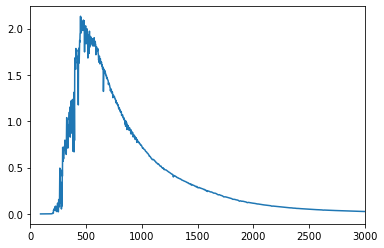

In [9]:
plt.xlim(0,3000)
plt.plot(x.to('nm').magnitude, y.to('W/(m**2*nm)').magnitude)

In [10]:
fluxsun=interp1d(x.magnitude, np.nan_to_num(y.magnitude))

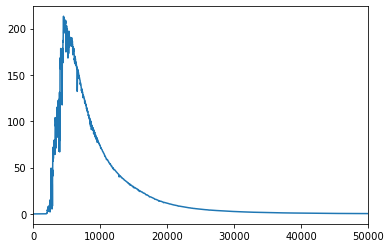

In [11]:
plt.xlim(0,5e4)
plt.plot(x.magnitude, fluxsun(x.magnitude))

# Define LSST filters

In [13]:
LSSTrspeclitefilter=speclite.filters.load_filter('lsst-r')

LSSTgspeclitefilter=speclite.filters.load_filter('lsst-g')


SDSSgspeclitefilter=speclite.filters.load_filter('sdss2010-g')


LSSTrspeclite=Filter(LSSTrspeclitefilter.wavelength, LSSTrspeclitefilter(LSSTrspeclitefilter.wavelength), name='LSSTrspeclite', dtype='photon', unit='AA')

LSSTgspeclite=Filter(LSSTgspeclitefilter.wavelength, LSSTgspeclitefilter(LSSTgspeclitefilter.wavelength), name='LSSTgspeclite', dtype='photon', unit='AA')

SDSSgspeclite=Filter(SDSSgspeclitefilter.wavelength, SDSSgspeclitefilter(SDSSgspeclitefilter.wavelength), name='SDSSgspeclite', dtype='photon',unit='AA')

# Compare speclite and pyphot filters

## Plot comparison

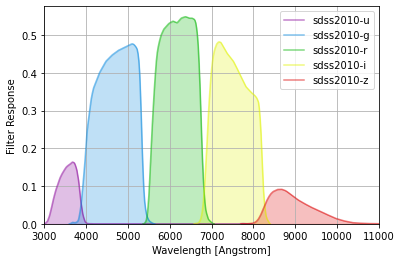

In [14]:
speclite.filters.plot_filters(sdssspeclite, wavelength_limits=(3000, 11000))


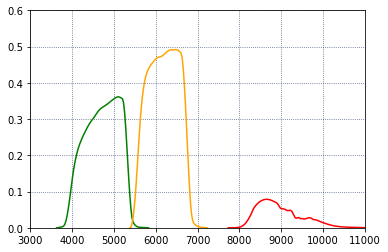

In [15]:
plt.xlim(3000,11000)
plt.ylim(0,0.6)
plt.plot(SDSS_g.wavelength.value,SDSS_g.transmit,color='green')
plt.plot(SDSS_r.wavelength.value,SDSS_r.transmit,color='orange')
plt.plot(lib['SDSS_z'].wavelength.value,lib['SDSS_z'].transmit,color='red')
plt.grid(b=True, which='major', color='#445577', linestyle=':')


In [15]:
SDSS_g.wavelength

<Quantity([3630. 3655. 3680. 3705. 3730. 3755. 3780. 3805. 3830. 3855. 3880. 3905.
 3930. 3955. 3980. 4005. 4030. 4055. 4080. 4105. 4130. 4155. 4180. 4205.
 4230. 4255. 4280. 4305. 4330. 4355. 4380. 4405. 4430. 4455. 4480. 4505.
 4530. 4555. 4580. 4605. 4630. 4655. 4680. 4705. 4730. 4755. 4780. 4805.
 4830. 4855. 4880. 4905. 4930. 4955. 4980. 5005. 5030. 5055. 5080. 5105.
 5130. 5155. 5180. 5205. 5230. 5255. 5280. 5305. 5330. 5355. 5380. 5405.
 5430. 5455. 5480. 5505. 5530. 5555. 5580. 5605. 5630. 5655. 5680. 5705.
 5730. 5755. 5780. 5805. 5830.], 'angstrom')>

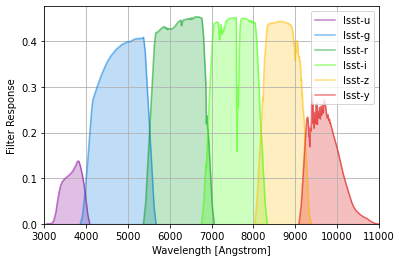

In [91]:
speclite.filters.plot_filters(lsstspeclite, wavelength_limits=(3000, 11000))


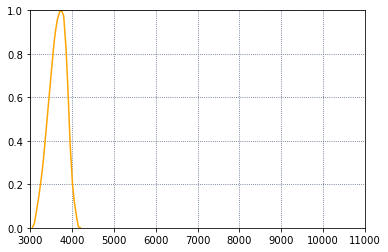

In [92]:
#Johnson filters are normalized to one.

plt.xlim(3000,11000)
plt.ylim(0,1)
plt.plot(JohnsonU.wavelength.value,JohnsonU.transmit,color='orange')
plt.grid(b=True, which='major', color='#445577', linestyle=':')

## Comparison of BB flux for a filter gotten out of speclite or out of pyphot (RUN STANDARD BLACKBODY BELOW FIRST)

In [ ]:
# Note that even if filters  in speclite and pyphot are defined with different normalizations ....

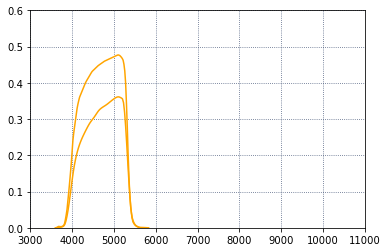

In [16]:
plt.xlim(3000,11000)
plt.ylim(0,0.6)
plt.plot(SDSS_g.wavelength.value,SDSS_g.transmit,color='orange')
plt.plot(SDSSgspeclite.wavelength.value,SDSSgspeclite.transmit,color='orange')

plt.grid(b=True, which='major', color='#445577', linestyle=':')

wavelength=SDSS_g.wavelength

In [ ]:
# anyways their fluxes calculated by pyphot are the same

In [26]:
SDSS_g.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))

<Quantity(685680913.6317352, 'erg / angstrom * centimeter ** 2 * second')>

In [27]:
SDSSgspeclite.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))

698250792.875651

In [ ]:
# The reason is that get_flux gets the average flux as defined for a photon counter-type detector in the second equation of 
# https://mfouesneau.github.io/docs/pyphot/photometry.html. In that definition the term in the numerator makes sure
# the average flux is independent of filter normalization. Note that the average flux definition is different for energy counters as Johnson
# see the section Johson system in the same page.

In [1117]:
# Filter normalization for LSST
-scipy.integrate.trapz(LSSTr.wavelength.value,LSSTr.transmit)

607.2297481301566

In [1119]:
LSSTr.norm

607.2297481301564

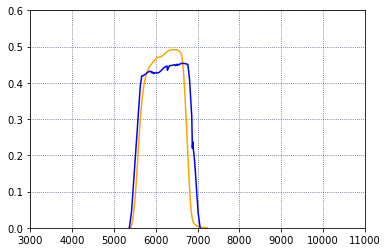

In [28]:
# Compare LLSTr and SDSSr. They are very similar.

plt.xlim(3000,11000)
plt.ylim(0,0.6)
plt.plot(SDSS_r.wavelength.value,SDSS_r.transmit,color='orange')
plt.plot(LSSTrspeclite.wavelength.value,LSSTrspeclite.transmit,color='blue')

plt.grid(b=True, which='major', color='#445577', linestyle=':')

# Solar luminosities

In [19]:
# Below we normalize the solar luminosities with the normalization of the filter in them. This guarantees to obtain matching results with vdb table 2.1. 
# The normalization doesn't affect absolute magnitude calculations as long as we correspondingly define the luminosity of an object with the same filter normalization
# This is consistently done in the first paragraph of section "Tde standard luminosities in bands".

# x and y are variables containing the Sun's flux on earth (defined in a section above)
#x=pyphot.sun.Sun(distance=rsun).wavelength
#y=pyphot.sun.Sun(distance=rsun).flux

Lsun=-scipy.integrate.trapz(x.magnitude,np.nan_to_num(y.magnitude))*4*math.pi*rsun.magnitude**2
LsunU=JohnsonU.get_flux(x,y).magnitude*4*math.pi*rsun.magnitude**2*JohnsonU.norm
LsunV=JohnsonV.get_flux(x,y).magnitude*4*math.pi*rsun.magnitude**2*JohnsonV.norm
LsunSDSSr=SDSS_r.get_flux(x,y).magnitude*4*math.pi*rsun.magnitude**2*SDSS_r.norm
LsunSDSSg=SDSS_g.get_flux(x,y).magnitude*4*math.pi*rsun.magnitude**2*SDSS_g.norm
LsunSDSSgspeclite=SDSSgspeclite.get_flux(x,y)*4*math.pi*rsun.magnitude**2*SDSSgspeclite.norm
LsunLSSTr=LSSTrspeclite.get_flux(x,y)*4*math.pi*rsun.magnitude**2*LSSTrspeclite.norm
LsunLSSTg=LSSTgspeclite.get_flux(x,y)*4*math.pi*rsun.magnitude**2*LSSTgspeclite.norm
LsunPS1g=PS1_g.get_flux(x,y).magnitude*4*math.pi*rsun.magnitude**2*PS1_g.norm
LsunGALEXNUV=GALEXNUV.get_flux(x,y).magnitude*4*math.pi*rsun.magnitude**2*GALEXNUV.norm


# AB magnitudes are independent of solar luminosity normalization.

mABSunU = -2.5 * np.log10(JohnsonU.get_flux(x,y).magnitude)-JohnsonU.AB_zero_mag
mABSunV = -2.5 * np.log10(JohnsonV.get_flux(x,y).magnitude)-JohnsonV.AB_zero_mag
mABSunSDSSr = -2.5 * np.log10(SDSS_r.get_flux(x,y).magnitude)-SDSS_r.AB_zero_mag
mABSunLSSTr = -2.5 * np.log10(LSSTrspeclite.get_flux(x,y))-LSSTrspeclite.AB_zero_mag
mABSunLSSTg = -2.5 * np.log10(LSSTgspeclite.get_flux(x,y))-LSSTgspeclite.AB_zero_mag


mABSunPS1g = -2.5 * np.log10(PS1_g.get_flux(x,y).magnitude)-PS1_g.AB_zero_mag
mABSunGALEXNUV = -2.5 * np.log10(GALEXNUV.get_flux(x,y).magnitude)-GALEXNUV.AB_zero_mag

MABSunU=mABSunU-5*np.log10((rsun/(10*unit['pc'].to('cm'))).magnitude)
MABSunV=mABSunV-5*np.log10((rsun/(10*unit['pc'].to('cm'))).magnitude)

MABSunSDSSr = mABSunSDSSr-5*np.log10((rsun/(10*unit['pc'].to('cm'))).magnitude)
MABSunLSSTr = mABSunLSSTr-5*np.log10((rsun/(10*unit['pc'].to('cm'))).magnitude)
MABSunLSSTg = mABSunLSSTg-5*np.log10((rsun/(10*unit['pc'].to('cm'))).magnitude)


MABSunPS1g = mABSunPS1g-5*np.log10((rsun/(10*unit['pc'].to('cm'))).magnitude)
MABSunGALEXNUV=mABSunGALEXNUV-5*np.log10((rsun/(10*unit['pc'].to('cm'))).magnitude)





In [20]:
LsunSDSSg

2.19648941002743e+32

In [21]:
LsunLSSTg

2.873613721839313e+32

In [22]:
LsunLSSTr

2.8425049603471277e+32

In [23]:
LsunSDSSr

2.578999873138527e+32

In [1115]:
JohnsonU.get_flux(x,y).magnitude*4*math.pi*rsun.magnitude**2*JohnsonU.norm

1.5692881205947524e+32

In [41]:
np.savetxt('filteroutput/LsunU.txt',np.array([LsunU]))
np.savetxt('filteroutput/LsunV.txt',np.array([LsunV]))
np.savetxt('filteroutput/LsunGALEXNUV.txt',np.array([LsunGALEXNUV]))
np.savetxt('filteroutput/LsunSDSSr.txt',np.array([LsunSDSSr]))
np.savetxt('filteroutput/LsunLSSTr.txt',np.array([LsunLSSTr]))
np.savetxt('filteroutput/LsunLSSTg.txt',np.array([LsunLSSTg]))

np.savetxt('filteroutput/LsunPS1g.txt',np.array([LsunPS1g]))


np.savetxt('filteroutput/mappABSunU.txt',np.array([mABSunU]))
np.savetxt('filteroutput/mappABSunV.txt',np.array([mABSunV]))
np.savetxt('filteroutput/mappABSunSDSSr.txt',np.array([mABSunSDSSr]))
np.savetxt('filteroutput/mappABSunLSSTr.txt',np.array([mABSunLSSTr]))
np.savetxt('filteroutput/mappABSunLSSTg.txt',np.array([mABSunLSSTg]))

np.savetxt('filteroutput/mappABSunPS1g.txt',np.array([mABSunPS1g]))
np.savetxt('filteroutput/mappABSunGALEXNUV.txt',np.array([mABSunGALEXNUV]))


np.savetxt('filteroutput/mABSunU.txt',np.array([MABSunU]))
np.savetxt('filteroutput/mABSunV.txt',np.array([MABSunV]))
np.savetxt('filteroutput/mABSunSDSSr.txt',np.array([MABSunSDSSr]))
np.savetxt('filteroutput/mABSunLSSTr.txt',np.array([MABSunLSSTr]))
np.savetxt('filteroutput/mABSunLSSTg.txt',np.array([MABSunLSSTg]))

np.savetxt('filteroutput/mABSunPS1g.txt',np.array([MABSunPS1g]))
np.savetxt('filteroutput/mABSunGALEXNUV.txt',np.array([MABSunGALEXNUV]))




# Standard black Body, T=2.5e4 Kelvin

In [24]:
wavelength=x.magnitude*u.AA 
frequency=((1/x.to('m')*scipy.constants.speed_of_light*unit('m/s')).magnitude)*u.Hz

Tben=2.5e4*u.K

bb=models.BlackBody(temperature=Tben) # BB spectrum per unit frequency. Units are erg/(Hz s sr cm^2). The argument of bb is the frequency at which the flux needs to be calculated.

intensityv=scipy.integrate.trapz(frequency.value,math.pi*bb(frequency).value)
# Intensity per unit cm2 of BB from integrating over frequency. To get lumi need to integrate over BB size. Units are erg/(s cm^2). 
#The factor of pi comes from integrating the bb spectrum over solid angle of emission. 
bblambda=(bb(frequency)*frequency**2/cAAs).to(1/(u.s*u.sr*u.cm**2*u.AA)*u.erg)  # bb spectrum in units of erg/(s AA sr cm^2)    
intensityl=-scipy.integrate.trapz(wavelength.value,(math.pi*bblambda).value) 
# Intensity per unit cm2 of BB from integrating over wavelength. To get lumi need to integrate over BB size. Units are erg/(s cm^2)


In [25]:
intensityv/intensityl #Check integrating over frequency or wavelength gives same result

1.00004439781732

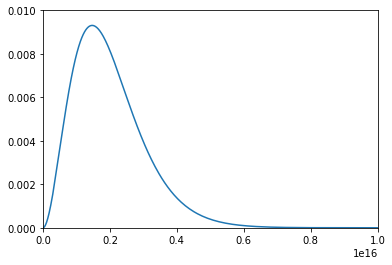

In [26]:
#Plot BB spectrum as function of frequency. Matches mathematica
plt.xlim(0,1e16)
plt.ylim(0,0.01)
plt.plot(frequency,math.pi*bb(frequency).value)

# Luminosity for standard TDE (fixed Lg and Temperature)

In [27]:
# Get total luminosity from normalizing to standard TDE
Lgben=10**42.5*unit('erg/s')

Lnorm=Lgben/(math.pi*((6.3e14*bb(6.3e14).value)*unit('erg/s/cm**2'))) #Lnorm is the area 4*Pi*r^2 of the standard TDE. Green corresponds to a frequency of 6.3e14/s.

# Luminosities in different bands are then
LSDSSg=Lnorm*(SDSS_g.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*SDSS_g.norm*unit('AA'))
LSDSSgspeclite=Lnorm*(SDSSgspeclite.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*SDSSgspeclite.norm*unit('AA'))
LSDSSr=Lnorm*(SDSS_r.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*SDSS_r.norm*unit('AA'))
LLSSTr=Lnorm*(LSSTrspeclite.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*LSSTrspeclite.norm)*unit('erg/(s*cm**2)')
LLSSTg=Lnorm*(LSSTgspeclite.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*LSSTgspeclite.norm)*unit('erg/(s*cm**2)')

LPS1_g=Lnorm*(PS1_g.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*PS1_g.norm*unit('AA'))
LGALEXNUV=Lnorm*(GALEXNUV.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*GALEXNUV.norm*unit('AA'))


Lbol=Lnorm*(intensityl*unit('erg/s/cm**2'))


np.savetxt('filteroutput/LTDEGALEXNUV.txt',np.array([LGALEXNUV.magnitude]))




In [28]:
LLSSTg

<Quantity(3.544824235851175e+41, 'erg / second')>

In [11]:
Lbol

<Quantity(2.257174350071858e+43, 'erg / second')>

In [105]:
LSDSSg

<Quantity(2.924336487297865e+41, 'erg / second')>

In [12]:
np.log10(Lbol.magnitude)

43.353565106419225

In [620]:
cAAs/GALEXNUV.leff

<Quantity(1319153965938203.0, '1 / second')>

In [1205]:
LSDSSgspeclite.value

4.1760681037146464e+41

In [ ]:
#Note that even if SDSS pyphot and SDSS green filters have different normalizations, the ratio to sun luminosity, and thus the absolute magnitudes,
# are normalization independent. 

In [107]:
LSDSSgspeclite.value/LsunSDSSgspeclite

1361289098.315851

In [108]:
LSDSSg.value/LsunSDSSg

1331368352.5846572

## Check TDE luminosities in different bands

In [1122]:
# Check what are the bolometric luminosities, and lumis in different astro bands. Used to compare with mathematica's Llim

np.log10(Lbol.magnitude.)

43.353565106419225

In [1221]:
LSDSSr.magnitude/LsunSDSSr

588043779.6532362

In [1222]:
LPS1_g.magnitude/LsunPS1g

1190497787.368151

In [1223]:
LGALEXNUV.magnitude/LsunGALEXNUV

210192440363.39612

# TDE events: data tables

In [103]:
#logLgarray=np.array([42.7,42.3,42.7,43.2,43.4, 43.2, 43.5,43.2,42.6,44.8,43.5,42.3])
#MBHarray=np.array([7.4 ,  6.4 , 7.3 ,6.1 ,6.2, 5.9 , 6.0 ,5.7 , 6.4 ,8.3 , 6.5 , 5.8 ])
#Tarray=(np.array([4.9,4.9,2.4,2.9,2.2 ,1.2 , 2.6 , 2.1 , 3.5 ,  2.5 , 3.0, 3.0])*10**4)*u.K

logLgarray=np.array([42.7,42.3, 42.7, 
                     43.2,
                     43.4,43.2,43.5,43.2,42.6,
                     44.8,
                     43.5,42.3])
Tarray=(np.array([4.9,4.9 ,2.4,
                  2.9 ,
                  2.2, 1.2 , 2.6 , 2.1 , 3.5 ,  
                  2.5 ,
                  3.0, 3.0])*10**4)*u.K


MBHarray=np.array([7.4 ,6.4,  7.3, 
                   6.1 ,  
                   6.2, 5.9 , 6.0 ,5.7 , 6.4 ,
                   8.3 ,
                   6.5 , 5.8 ])

logLgarrayminmax=np.array([
                     44.8,
                   42.3])
Tarrayminmax=(np.array([ 
                  2.5 ,
                  3.0])*10**4)*u.K


MBHarrayminmax=np.array([
                   8.3 ,
                  5.8 ])


bbarray=np.array([models.BlackBody(temperature=xi) for xi in Tarray])
intensityarray=np.array([scipy.integrate.trapz(frequency.value,math.pi*bbarray[i](frequency).value)*unit('erg/s/cm**2') for i in range(0,len(bbarray))])

bbarrayminmax=np.array([models.BlackBody(temperature=xi) for xi in Tarrayminmax])
intensityarrayminmax=np.array([scipy.integrate.trapz(frequency.value,math.pi*bbarrayminmax[i](frequency).value)*unit('erg/s/cm**2') for i in range(0,len(bbarrayminmax))])

Lnormarray=np.array([(10**logLgarray[i])/(math.pi*((6.3e14*bbarray[i](6.3e14).value)))*unit('cm**2')  for i in range(0,len(bbarray))]) #Lnorm is 4*Pi*r^2 of the TDE

Lnormarrayunitsout=np.array([(10**logLgarray[i])/(math.pi*((6.3e14*bbarray[i](6.3e14).value)))  for i in range(0,len(bbarray))])*unit('cm**2') #Lnorm is 4*Pi*r^2 of the TDE


LLSSTgarray=Lnormarrayunitsout*(LSSTgspeclite.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*LSSTgspeclite.norm*unit('AA'))



Lbolarray=np.multiply(Lnormarray,intensityarray)
log10Lbolarray=np.log10([Lbolarray[i].magnitude for i in range(0,len(Lbolarray))])

Lnormarrayminmax=np.array([(10**logLgarrayminmax[i])/(math.pi*((6.3e14*bbarrayminmax[i](6.3e14).value)))*unit('cm**2')  for i in range(0,len(bbarrayminmax))]) #Lnorm is 4*Pi*r^2 of the TDE

Lbolarrayminmax=np.multiply(Lnormarrayminmax,intensityarrayminmax)
log10Lbolarrayminmax=np.log10([Lbolarrayminmax[i].magnitude for i in range(0,len(Lbolarrayminmax))])



In [122]:
np.mean(np.log10((np.sort(LLSSTgarray.value))[0:11]))

41.96234212569481

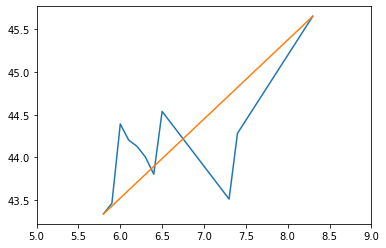

In [30]:
#Bolometric luminosity plot

LgMrelation=interp1d(MBHarray, logLgarray)
LbolMrelation=interp1d(MBHarray, log10Lbolarray)
TMrelation=interp1d(MBHarray, Tarray)


LgMrelationminmax=interp1d(MBHarrayminmax, logLgarrayminmax)
LbolMrelationminmax=interp1d(MBHarrayminmax, log10Lbolarrayminmax)
TMrelationminmax=interp1d(MBHarrayminmax, Tarrayminmax)



MBHplot=np.array([5.8+0.1*i for i in range(0,26)])
plt.xlim(5,9)
plt.plot(MBHplot, LbolMrelation(MBHplot))
plt.plot(MBHplot, LbolMrelationminmax(MBHplot))

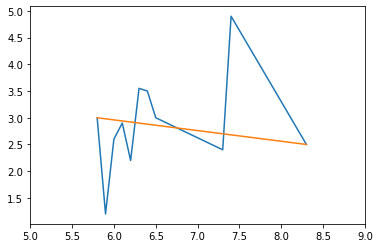

In [901]:
# Temperature plot

plt.xlim(5,9)
plt.plot(MBHplot, TMrelation(MBHplot)/1e4)
plt.plot(MBHplot,TMrelationminmax(MBHplot)/1e4)


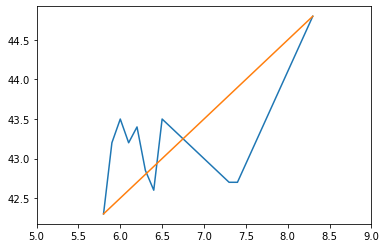

In [900]:
# Temperature plot
plt.xlim(5,9)
plt.plot(MBHplot,LgMrelation(MBHplot))
plt.plot(MBHplot,LgMrelationminmax(MBHplot))


# R-band luminosities

## First case: constant Lg and Temperature

In [31]:
LSDSSr

<Quantity(1.516564833125596e+41, 'erg / second')>

In [32]:
LLSSTr

<Quantity(1.6587039237157536e+41, 'erg / second')>

## Second case: bolometric lumi scaling up with mass, standard T=2.5e4

In [98]:
Lnormarray=np.array([(10**logLgarray[i])/(math.pi*((6.3e14*bbarray[i](6.3e14).value))) for i in range(0,len(bbarray))])*unit('cm**2')  #Lnorm is 4*Pi*r^2 of the TDE


In [99]:
Lnormarray

<Quantity([5.86162927e+29 2.33355664e+29 1.73403044e+30 3.98886982e+30
 1.01629977e+31 2.48112434e+31 9.53023144e+30 6.99300399e+30
 7.48678273e+29 2.03324197e+32 7.53898061e+30 4.75677519e+29], 'centimeter ** 2')>

In [89]:
Lnormarray=10**LbolMrelationminmax(MBHplot)*unit('erg/s')/(intensityl*unit('erg/s/cm**2'))  
# Lnorm is 4Pi rbb^2. I normalize to the bolometric lumi because I'm assuming that's the one that scales with the BH mass linearly. The g-band lumi also has a slight
# tendency to scale up with BH mass in data (see previous section) but it's less pronounced, so I prefer to normalize to the bolometric. This, however, 
# does end up leading to a scaling up of Lg with BH mass a posteriori, as can be seen in the plot below, as I'm holding the teemperature fixed in this black body. 
# In principle the temperature also depends on the BH mass, but I'm not adding that, as I don't know how it scales.


In [91]:
Lgbenarray=Lnormarray*(math.pi*((6.3e14*bb(6.3e14).value)*unit('erg/s/cm**2')))

LSDSSgarray=Lnormarray*(SDSS_g.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*SDSS_g.norm*unit('AA'))

LSDSSrarray=Lnormarray*(SDSS_r.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*SDSS_r.norm*unit('AA'))

LLSSTrarray=Lnormarray*(LSSTrspeclite.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*LSSTrspeclite.norm*unit('AA'))

LLSSTgarray=Lnormarray*(LSSTgspeclite.get_flux(wavelength.value*unit('AA'),((math.pi*bblambda).value)*unit('flam'))*LSSTgspeclite.norm*unit('AA'))


In [65]:
np.mean(LSDSSgarray)

<Quantity(1.1645624912700552e+43, 'erg / second')>

In [60]:
np.min(LLSSTgarray.magnitude)

3.431401287080084e+41

In [66]:
np.max(np.log10(LLSSTgarray.magnitude))

43.84961398759039

In [1285]:
LSDSSrarray/LsunSDSSr

<Quantity([5.69228274e+08 7.04453227e+08 8.71802002e+08 1.07890588e+09
 1.33520903e+09 1.65239914e+09 2.04494042e+09 2.53073317e+09
 3.13193007e+09 3.87594634e+09 4.79670992e+09 5.93620860e+09
 7.34640477e+09 9.09160486e+09 1.12513919e+10 1.39242544e+10
 1.72320779e+10 2.13257026e+10 2.63918022e+10 3.26613963e+10
 4.04203850e+10 5.00225867e+10 6.19058718e+10 7.66121311e+10
 9.48119857e+10 1.17335369e+11], 'erg / second')>

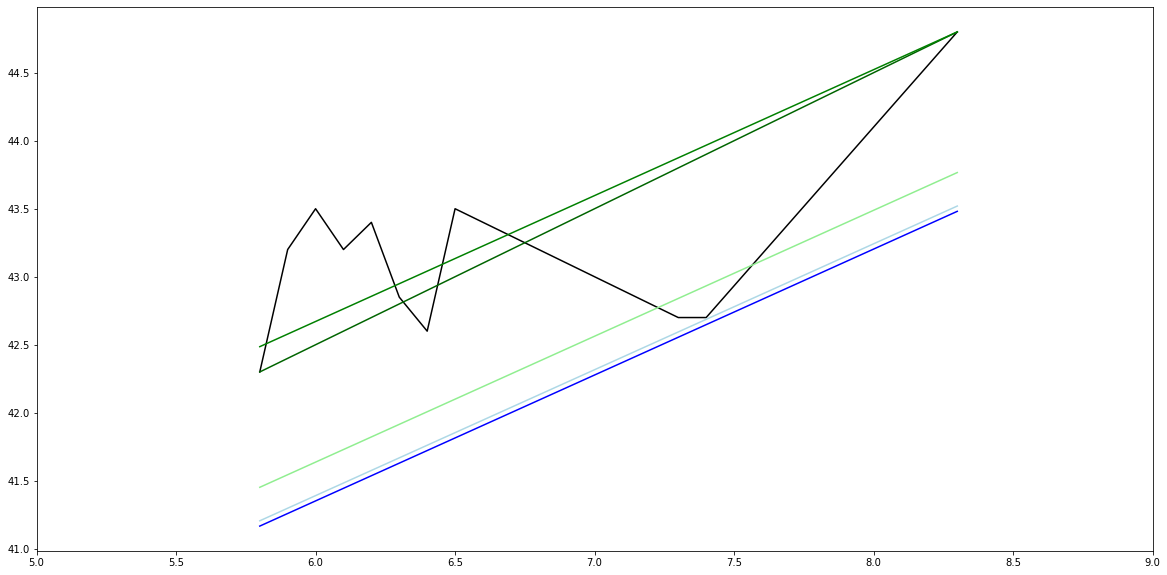

In [1281]:
# Plot luminosities

plt.figure(figsize=(20,10))
plt.xlim(5,9)
plt.plot(MBHplot,LgMrelation(MBHplot), color="black") # Lg from data interpolation
plt.plot(MBHplot,LgMrelationminmax(MBHplot),color='darkgreen') # Lg from data line interpolation 
plt.plot(MBHplot, np.log10(Lgbenarray.magnitude),color='green') # Lg from a standard blackbody scaling up bolometric lumi with mass
plt.plot(MBHplot, np.log10(LSDSSgarray.magnitude),color='lightgreen') # SDSS green band lumi from a standard blackbody scaling up bolometric lumi with mass

plt.plot(MBHplot, np.log10(LSDSSrarray.magnitude),color='blue') # SDSS red band lumi from a standard blackbody scaling up bolometric lumi with mass
plt.plot(MBHplot, np.log10(LLSSTrarray.magnitude),color='lightblue') # LSST red band lumi from a standard blackbody scaling up bolometric lumi with mass


In [68]:
LSDSSgarray.magnitude

array([2.83076715e+41, 3.50323963e+41, 4.33546361e+41, 5.36538936e+41,
       6.63998263e+41, 8.21736621e+41, 1.01694705e+42, 1.25853136e+42,
       1.55750604e+42, 1.92750467e+42, 2.38539958e+42, 2.95207126e+42,
       3.65336056e+42, 4.52124701e+42, 5.59530718e+42, 6.92451935e+42,
       8.56949702e+42, 1.06052529e+43, 1.31246198e+43, 1.62424833e+43,
       2.01010215e+43, 2.48761879e+43, 3.07857350e+43, 3.80991447e+43,
       4.71499162e+43, 5.83507744e+43])

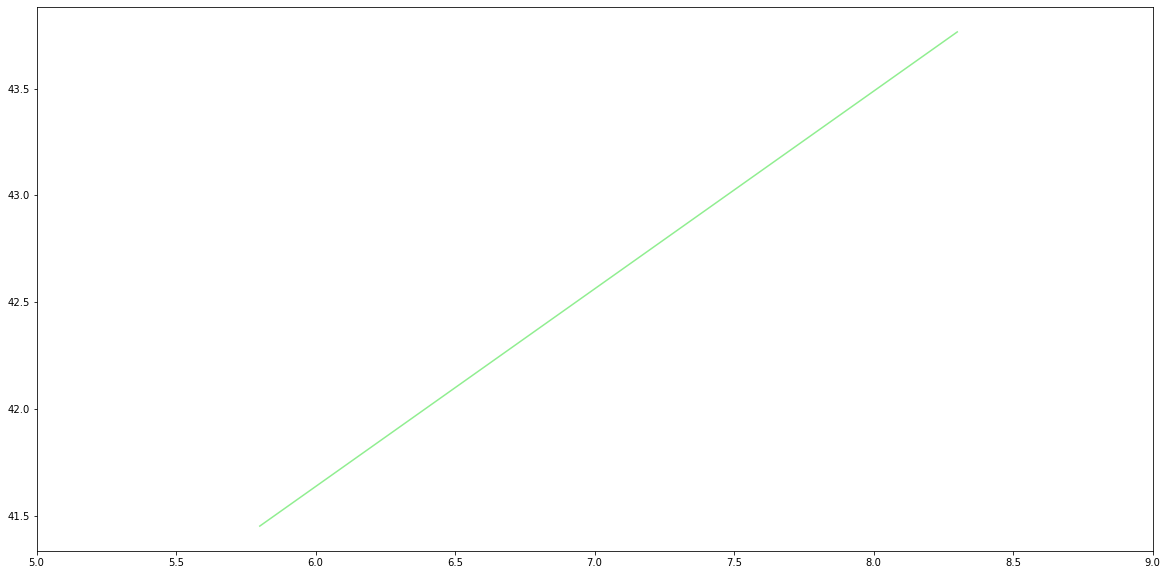

In [70]:
# Plot luminosities

plt.figure(figsize=(20,10))
plt.xlim(5,9)
plt.plot(MBHplot, np.log10(LSDSSgarray.magnitude),color='lightgreen') # SDSS green band lumi from a standard blackbody scaling up bolometric lumi with mass


In [1283]:
np.savetxt('filteroutput/MBHpoints.txt',np.array([MBHplot]))
np.savetxt('filteroutput/LLSTrTDElumi.txt',np.array([LLSSTrarray.magnitude]))
